In [1]:
"""
Version 2 of the model which will hopefully be better!

To make things easier, we will only have black: 0, and white: 1, for the text color available
For the V2, I will with all the variation of black - white for the background. Other colors will be added for the V3. 

Example of the new dataSet: 

====================================
Text Color      |  Background Color
====================================
Black           |  (255, 255, 255)
------------------------------------
White           |  (0, 0, 0)
====================================


"""



'\nVersion 2 of the model which will hopefully be better!\n\nTo make things easier, we will only have black: 0, and white: 1, for the text color available\nFor the V2, I will with all the variation of black - white for the background. Other colors will be added for the V3. \n\nExample of the new dataSet: \n\n====================================\nText Color      |  Background Color\n====================================\nBlack           |  (255, 255, 255)\n------------------------------------\nWhite           |  (0, 0, 0)\n====================================\n\n\n'

In [2]:
# Create Custom dataset

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
Bgd_Col = [(0, 0, 0), (255, 255, 255), (88, 215, 20), 
                                (53, 115, 12), (177, 221, 110), (73, 92, 167),
                                (76, 200, 169), (32, 147, 16), (156, 34, 180), 
                                (213, 146, 227), (215, 234, 174), (223, 88, 187), 
                                (123, 34, 170), (81, 195, 210), (4, 154, 124), 
                                (206, 201, 28), (149, 147, 86), (255, 0, 0)]

data = {'RED': [],
        'GREEN': [],
        'BLUE': [],
        'Txt_Col': [1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1]}

for values in Bgd_Col:
    data['RED'].append(values[0])
    data['GREEN'].append(values[1])
    data['BLUE'].append(values[2])


df = pd.DataFrame(data)
df.to_csv('dataV2.csv') # Save DataFrame as a csv file
df

,RED,GREEN,BLUE,Txt_Col
0,0,0,0,1
1,255,255,255,0
2,88,215,20,0
3,53,115,12,1
4,177,221,110,0
5,73,92,167,1
6,76,200,169,0
7,32,147,16,1
8,156,34,180,1
9,213,146,227,0


In [3]:
import plotly.express as px

px.scatter_3d(df, x = 'RED', y = 'GREEN', z = 'BLUE', opacity = 0.5)

In [4]:
import numpy as np
dataset = np.genfromtxt('dataV2.csv', delimiter=',', skip_header = True, usecols=(1, 2, 3, 4))
dataset[:, 0:3] = (dataset[:, 0:3])/255

In [5]:
print(dataset[:, 0:3], "\n")
print((dataset[:, 3]))

[[0.         0.         0.        ]
 [1.         1.         1.        ]
 [0.34509804 0.84313725 0.07843137]
 [0.20784314 0.45098039 0.04705882]
 [0.69411765 0.86666667 0.43137255]
 [0.28627451 0.36078431 0.65490196]
 [0.29803922 0.78431373 0.6627451 ]
 [0.1254902  0.57647059 0.0627451 ]
 [0.61176471 0.13333333 0.70588235]
 [0.83529412 0.57254902 0.89019608]
 [0.84313725 0.91764706 0.68235294]
 [0.8745098  0.34509804 0.73333333]
 [0.48235294 0.13333333 0.66666667]
 [0.31764706 0.76470588 0.82352941]
 [0.01568627 0.60392157 0.48627451]
 [0.80784314 0.78823529 0.10980392]
 [0.58431373 0.57647059 0.3372549 ]
 [1.         0.         0.        ]] 

[1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

model = Sequential()
model.add(Dense(1, input_dim = 3, activation = 'linear'))
model.compile(loss = 'mse', optimizer=tf.keras.optimizers.Adam(0.01))
history = model.fit(x = dataset[: , 0:3], y = dataset[: , 3], epochs = 350)

Epoch 1/350
1/1 [==============================] - 1s 1s/step - loss: 2.0738
Epoch 2/350
1/1 [==============================] - 0s 3ms/step - loss: 2.0128
Epoch 3/350
1/1 [==============================] - 0s 3ms/step - loss: 1.9533
Epoch 4/350
1/1 [==============================] - 0s 3ms/step - loss: 1.8952
Epoch 5/350
1/1 [==============================] - 0s 4ms/step - loss: 1.8385
Epoch 6/350
1/1 [==============================] - 0s 4ms/step - loss: 1.7834
Epoch 7/350
1/1 [==============================] - 0s 4ms/step - loss: 1.7297
Epoch 8/350
1/1 [==============================] - 0s 4ms/step - loss: 1.6775
Epoch 9/350
1/1 [==============================] - 0s 4ms/step - loss: 1.6268
Epoch 10/350
1/1 [==============================] - 0s 4ms/step - loss: 1.5776
Epoch 11/350
1/1 [==============================] - 0s 4ms/step - loss: 1.5300
Epoch 12/350
1/1 [==============================] - 0s 4ms/step - loss: 1.4839
Epoch 13/350
1/1 [==============================] - 0s 4ms/ste

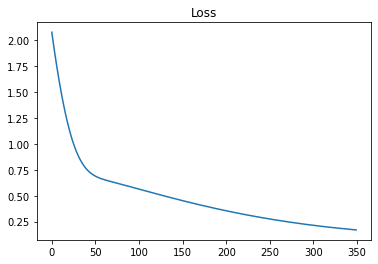

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title("Loss")
plt.show()

In [8]:
predictions = model.predict(dataset[:, 0:3])

1/1 [==============================] - 0s 47ms/step


In [9]:
dataset

array([[0.        , 0.        , 0.        , 1.        ],
       [1.        , 1.        , 1.        , 0.        ],
       [0.34509804, 0.84313725, 0.07843137, 0.        ],
       [0.20784314, 0.45098039, 0.04705882, 1.        ],
       [0.69411765, 0.86666667, 0.43137255, 0.        ],
       [0.28627451, 0.36078431, 0.65490196, 1.        ],
       [0.29803922, 0.78431373, 0.6627451 , 0.        ],
       [0.1254902 , 0.57647059, 0.0627451 , 1.        ],
       [0.61176471, 0.13333333, 0.70588235, 1.        ],
       [0.83529412, 0.57254902, 0.89019608, 0.        ],
       [0.84313725, 0.91764706, 0.68235294, 0.        ],
       [0.8745098 , 0.34509804, 0.73333333, 1.        ],
       [0.48235294, 0.13333333, 0.66666667, 1.        ],
       [0.31764706, 0.76470588, 0.82352941, 0.        ],
       [0.01568627, 0.60392157, 0.48627451, 1.        ],
       [0.80784314, 0.78823529, 0.10980392, 0.        ],
       [0.58431373, 0.57647059, 0.3372549 , 1.        ],
       [1.        , 0.        ,

In [10]:
true_text_colors = dataset[:, 3]
true_text_colors

array([1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1.])

In [11]:
print(true_text_colors[:])

[1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.]


In [12]:
print(abs(predictions).T)

[[0.71910286 0.3069228  0.40590346 0.550658   0.37757578 0.56640893
  0.41538253 0.50858444 0.63479    0.46691632 0.34870136 0.5498541
  0.6401482  0.4180785  0.4931808  0.4086761  0.48656246 0.6844642 ]]


In [13]:
diff = abs(true_text_colors - predictions.flatten())

In [14]:
print(diff[:])

[0.28089714 0.30692279 0.40590346 0.44934201 0.37757578 0.43359107
 0.41538253 0.49141556 0.36521    0.46691632 0.34870136 0.4501459
 0.35985178 0.41807851 0.50681919 0.40867609 0.51343754 0.31553578]


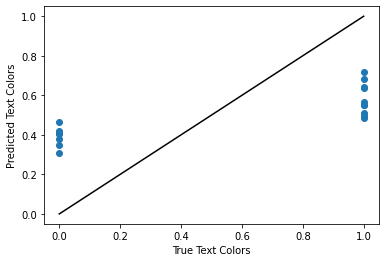

In [15]:
#Compare the real data vs our prediction
import matplotlib.pyplot as plt
plt.scatter(true_text_colors, predictions)
plt.xlabel('True Text Colors')
plt.ylabel('Predicted Text Colors')
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [21]:
Background = (0, 1, 0.89)

text_predict = abs((model.predict([Background])))
text_predict # It should be (0, 0, 0) 

1/1 [==============================] - 0s 21ms/step


array([[0.34401742]], dtype=float32)

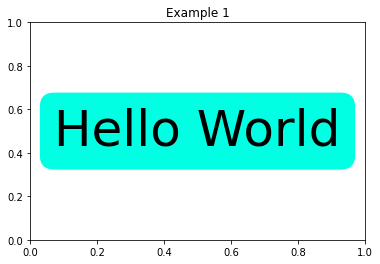

In [22]:
if text_predict[0][0] < 0.5: 
    text_predict[0][0] = 0
else:
    text_predict[0][0] = 1

import matplotlib.pyplot as plt
plt.title("Example 1")
plt.text(0.5, 0.5, "Hello World", size=50, rotation=0., color=(text_predict[0][0], text_predict[0][0], text_predict[0][0]),
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec=(1, 1, 1),
                   fc=Background,
                   )
         )
plt.show()

In [159]:
# Saving the model 

#model.save('saved_model/model2')

INFO:tensorflow:Assets written to: saved_model/model2\assets


1/1 [==============================] - 0s 26ms/step


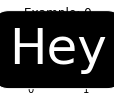

1/1 [==============================] - 0s 24ms/step


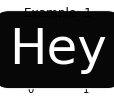

1/1 [==============================] - 0s 23ms/step


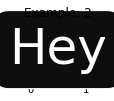

1/1 [==============================] - 0s 23ms/step


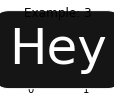

1/1 [==============================] - 0s 24ms/step


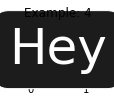

1/1 [==============================] - 0s 24ms/step


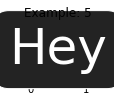

1/1 [==============================] - 0s 25ms/step


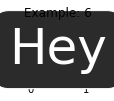

1/1 [==============================] - 0s 24ms/step


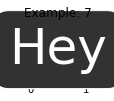

1/1 [==============================] - 0s 22ms/step


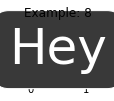

1/1 [==============================] - 0s 30ms/step


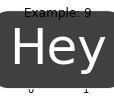

1/1 [==============================] - 0s 25ms/step


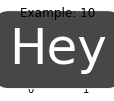

1/1 [==============================] - 0s 25ms/step


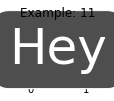

1/1 [==============================] - 0s 28ms/step


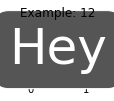

1/1 [==============================] - 0s 26ms/step


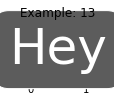

1/1 [==============================] - 0s 30ms/step


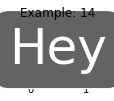

1/1 [==============================] - 0s 26ms/step


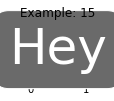

1/1 [==============================] - 0s 26ms/step


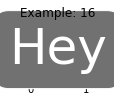

1/1 [==============================] - 0s 24ms/step


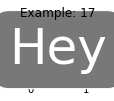

1/1 [==============================] - 0s 25ms/step


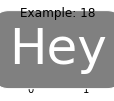

1/1 [==============================] - 0s 23ms/step


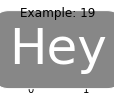

1/1 [==============================] - 0s 24ms/step


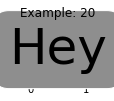

1/1 [==============================] - 0s 26ms/step


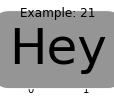

1/1 [==============================] - 0s 25ms/step


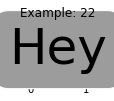

1/1 [==============================] - 0s 31ms/step


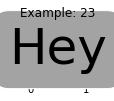

1/1 [==============================] - 0s 23ms/step


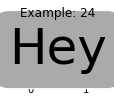

1/1 [==============================] - 0s 25ms/step


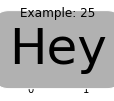

1/1 [==============================] - 0s 27ms/step


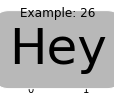

1/1 [==============================] - 0s 25ms/step


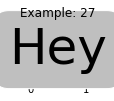

1/1 [==============================] - 0s 23ms/step


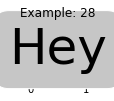

1/1 [==============================] - 0s 28ms/step


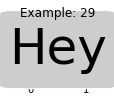

1/1 [==============================] - 0s 24ms/step


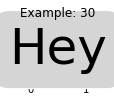

1/1 [==============================] - 0s 22ms/step


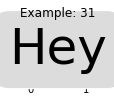

1/1 [==============================] - 0s 23ms/step


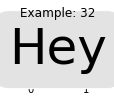

1/1 [==============================] - 0s 24ms/step


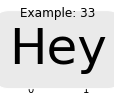

1/1 [==============================] - 0s 25ms/step


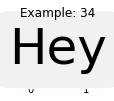

1/1 [==============================] - 0s 23ms/step


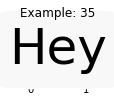

In [18]:
def new_color(val):
    Background = (val, val, val)

    text_predict = abs((model.predict([Background])))

    if text_predict[0][0] < 0.5: 
        text_predict[0][0] = 0
    else:
        text_predict[0][0] = 1
    return text_predict[0][0], Background


val = 0

for i in range(36):
    colorT, Background = new_color(val/36)
    plt.figure(figsize=(1,1))    
    plt.title("Example: " + str(i))
    plt.text(0.5, 0.5, "Hey", size=50, rotation=0., color=(colorT, colorT, colorT),
        ha="center", va="center",
        bbox=dict(boxstyle="round", ec=(1, 1, 1), fc=Background,))

    plt.show()
    val += 1
